# TP3 : Bord et composantes connexes

In [34]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.tri as mtri
import itertools as it
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components

## Table des matières 
0. [Previous functions](#part0)
1. [Exercice 1](#part1)
2. [Exercice 2](#part2)
3. [Exercice 3](#part3)

## Previous functions<a id="part0"></a>

In [56]:
def LoadVTX(nom_du_fichier) : 
    f = open(nom_du_fichier, 'r')
    f.readline() #On lit '$Noeuds', que l'on ignore. 
    nbr_vtx = int(f.readline()) #Conversion str -> int
    resultat = []
    for i in range(nbr_vtx) : 
        ligne = f.readline()
        tableau = ligne.split()
        couple = []
        couple.append(float(tableau[1])) #Conversion str -> float
        couple.append(float(tableau[2]))
        resultat.append(couple)
    f.close()
    return resultat 

def LoadELT(nom_du_fichier) : 
    f = open(nom_du_fichier, 'r') 
    f.readline() #On lit '$Noeuds', que l'on ignore. 
    nbr_vtx = int(f.readline()) #Conversion str -> int
    for i in range(nbr_vtx + 2) : #Lecture des vtx puis de '$FinNoeuds', '$Elements'.
        f.readline()
    nbr_elt = int(f.readline())
    resultat = []
    for i in range(nbr_elt) :
        ligne = f.readline()
        tableau = ligne.split() 
        triplet = []
        triplet.append(int(tableau[1])) #Conversion str -> int
        triplet.append(int(tableau[2]))
        triplet.append(int(tableau[3]))
        resultat.append(triplet)
    f.close()
    return resultat 

def PlotMesh(vtx,elt) : 
    X = [vtx[i][0] for i in range(len(vtx))]
    Y = [vtx[j][1] for j in range(len(vtx))]
    plt.triplot(X,Y,elt)
    nb_elements = len(elt)
    plt.title(fr"Maillage à ${nb_elements}$ éléments.")
    plt.axis('equal')

## Exercice 1<a id="part1"></a>

> **Question1.** Définition de `Boundary`. 

In [22]:
def Boundary(elt):
    D = {} #Dictionnaire vide visant à contenir les arêtes sur le bord ainsi la table de correspondance 
    Nc = len(elt) #Nombre de cellules 

    for i in range(Nc):
        
        s0 = int(elt[i][0]) 
        s1 = int(elt[i][1])  
        s2 = int(elt[i][2]) 
        
        b0=(s0,s1) #arête n°2
        b1=(s1,s2) #arête n°0
        b2=(s2,s0) #arête n°1 
        L = (b0,b1,b2) #Liste contenant les 3 arêtes du i-ème triangle 
    

        for k,b in zip([2,0,1], L):
            if b not in D.keys(): #Si l'arête b n'est pas dans D on l'ajoute avec la clée suivante. 
                D[b] = 3*i+k
            else : #Si b est déjà dans D, elle apparait plusieurs fois donc n'est pas dans le bord. 
                D.pop(b)
            if b[::-1] in D.keys(): #Si l'inverse de b est dans D, on enlève b et son inverse. 
                D.pop(b[::-1])
                D.pop(b)
        
    
    eltb = list(D.keys())
    be2e = list(D.values())
    #Conversion des list en tableaux numpy 
    eltb = np.array(eltb)
    be2e = np.array(be2e)
        
    #return eltb,be2e 
    return eltb #Ici seul eltb nous interesse.

In [23]:
elt = LoadELT('maillage1.msh')
vtx = LoadVTX('maillage1.msh')
eltb = Boundary(elt)
eltb

array([[ 0,  1],
       [ 4,  0],
       [ 1,  2],
       [ 2,  3],
       [ 3,  7],
       [ 9,  8],
       [ 8,  4],
       [10,  9],
       [ 7, 11],
       [11, 10]])

> **Question 2.** Définition de `PlotMeshBoundary`.

In [24]:
def PlotMeshBoundary(vtx, eltb) : 
    
    for e in eltb : #on boucle sur toutes les arêtes dans le bord 
        P1=e[0] #premier sommet de l'arête 
        P2=e[1] #second sommet de l'arête 
        x1=vtx[P1][0] #on extrait la première coordonnée du premier sommet de l'arête 
        y1=vtx[P1][1] #on extrait la seconde coordonnée du premier sommet de l'arête 
        x2=vtx[P2][0]
        y2=vtx[P2][1]
        plt.plot([x1,x2],[y1,y2])
    plt.title("Affichage du bord du mailage")    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show() 

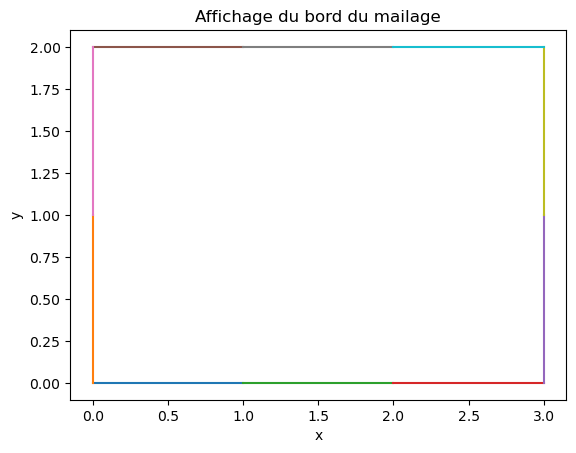

In [25]:
PlotMeshBoundary(vtx,eltb)

> **Question 3.** Modification de `Boundary`.

In [26]:
def Boundary(elt):
    D = {} #Dictionnaire vide visant à contenir les arêtes sur le bord ainsi la table de correspondance 
    Nc = len(elt) #Nombre de cellules 

    for i in range(Nc):
        
        s0 = int(elt[i][0]) 
        s1 = int(elt[i][1])  
        s2 = int(elt[i][2]) 
        
        b0=(s0,s1) #arête n°2
        b1=(s1,s2) #arête n°0
        b2=(s2,s0) #arête n°1 
        L = (b0,b1,b2) #Liste contenant les 3 arêtes du i-ème triangle 
    

        for k,b in zip([2,0,1], L):
            if b not in D.keys(): #Si l'arête b n'est pas dans D on l'ajoute avec la clée suivante. 
                D[b] = 3*i+k
            else : #Si b est déjà dans D, elle apparait plusieurs fois donc n'est pas dans le bord. 
                D.pop(b)
            if b[::-1] in D.keys(): #Si l'inverse de b est dans D, on enlève b et son inverse. 
                D.pop(b[::-1])
                D.pop(b)
        
    
    eltb = list(D.keys())
    be2e = list(D.values())
    #Conversion des list en tableaux numpy 
    eltb = np.array(eltb)
    be2e = np.array(be2e)
        
    return eltb,be2e 

In [27]:
eltb, be2e = Boundary(elt)
be2e

array([ 2,  4,  8, 14, 12, 21, 22, 27, 30, 33])

## Exercice 2<a id="part2"></a>

> **Question1.** Définition de `CCmpt`. 

In [32]:
def CCmpt(elt): # Composantes connexes d'un maillage (triangles)

    aretes_uniques = {} # dictionnaire contenant les arêtes n'appartenant qu'à 1 élément
    n = len(elt) #nombre d'élements dans le maillage 
    
    rows = [] #listes vides contenant plus tard éléments d'une matrice creuse 
    cols = []
    
    A = {0,1,2}
    combinaisons_indices = set(it.combinations(A,2))

    for p in range (n): # boucle sur le nombre d'élements 
        e = elt[p] 
    
        for ci in combinaisons_indices: #boucle sur toutes les arêtes de l'élément 
            
            f=[e[list(ci)[0]],e[list(ci)[1]]] #construction d'une arête à partir de deux indices de e 
            f=tuple(sorted(f)) #on convertit f en tuple et on trie (afin d'éviter les doublons)
        
            if f in aretes_uniques: #si f est dans arête unique
                appartient = aretes_uniques[f] # appartient est l'autre élément du maillage auquel appartient f : ils sont connectés 
                del aretes_uniques[f] # f n'est plus une arête unique
                rows.append(appartient)
                cols.append(p) 
                rows.append(p)
                cols.append(appartient) # On met à 1 dans la matrice de connexité les éléments connectés
        
            else:
                aretes_uniques[f]=p

    k = len(rows)    
    M = csr_matrix((np.ones(k), (rows, cols))) #matrice creuse représentant les éléments connectés entre eux dans le maillage
    n_components, cc = connected_components(csgraph=M, directed=False, return_labels=True)
    return cc

In [33]:
CCmpt(elt)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

> **Question 2.** 

In [40]:
def PlotMesh_withCC(vtx,elt): #Affichage graphique avec les composantes connexes dans une couleur différente
    nb_vertices = len(vtx) #nombre de sommets dans le maillage 
    X = [vtx[i][0] for i in range (nb_vertices)] #on extrait les premières coordonnées de tous les sommets des noeuds 
    Y = [vtx[i][1] for i in range (nb_vertices)] #idem pour les secondes 
    colors = ['blue','red','green','orange','magenta'] #On part du principe qu'il n'y a pas plus de 5 composantes connexes.
    
    cc = CCmpt(elt) #Calcule les composantes connexes  
    nb_elements = len(elt)
    nb_cc = max(cc)+1 #Donne le nombre de composantes connexes (si que des 0 le maillage est connexe nb_cc=1)
    
    for k in range (nb_cc): #Boucle sur le nombre de composantes connexes 
        connected_elts = [elt[j] for j in range(nb_elements) if cc[j] == k] #Extrait les éléments connectés à celle-ci 
        triangulation = mtri.Triangulation(X,Y,connected_elts) #Créer une triangulation 
        plt.triplot(triangulation,color = colors[k]) #L'affiche 
    plt.title("Affichage du maillage avec composantes connexes.")
    plt.axis('equal') 
    plt.show()

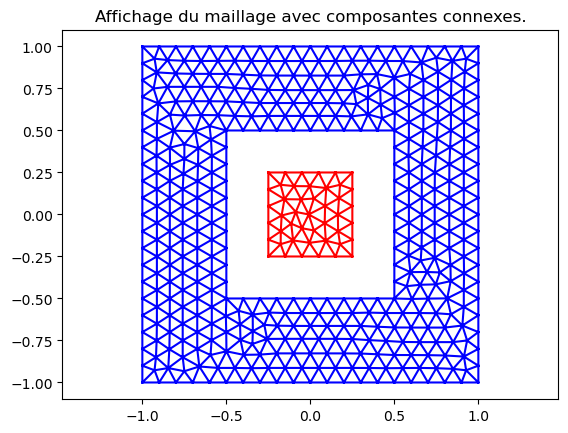

In [41]:
vtx = LoadVTX('maillage4.msh')
elt = LoadELT('maillage4.msh')
PlotMesh_withCC(vtx,elt)

> **Question 3.**

In [46]:
def CCmpt_Boundary(eltb) :
    noeuds_uniques={} #dictionnaire contenant (à la fin) les noeuds n'ayant apparus qu'une seule fois. 
    n=len(eltb) #nombre d'arêtes constituant le bord 
    rows=[] #listes vides contenant plus tard éléments d'une matrice creuse 
    cols=[]
    for p in range (n) : #boucle sur le nombre d'arêtes 
        e=eltb[p] #p-ieme arête du bord 
        for ci in (0,1) : 
            f=e[ci] #un noeud (une extrémité de l'arête e)
            if f in noeuds_uniques : 
                appartient=noeuds_uniques[f] #appartient est l'autre élément auquel appartient f : ils sont connectés 
                del noeuds_uniques[f] # f n'est plus un noeud unique 
                rows.append(appartient)
                cols.append(p)
                rows.append(p)
                cols.append(appartient)
            else : 
                noeuds_uniques[f]=p
    k=len(rows)
    M = csr_matrix((np.ones(k), (rows, cols)))
    n_components, cc=connected_components(csgraph=M,directed=False, return_labels=True)
    return cc

In [49]:
elt = LoadELT('maillage4.msh')
eltb,be2e = Boundary(elt)
CCmpt_Boundary(eltb)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

>**Question 4.**

In [53]:
def PlotMeshBND1_withCC (vtx,eltb): # Affichage graphique d'un contour avec composantes connexes dans une couleur différente
    colors = ['black','blue','red','green','orange','magenta'] #on part du principe qu'il n'y a pas plus de 6 composantes connexes. 
    cc = CCmpt_Boundary(eltb) #calcule les composantes connexes 
    for i in range (len(eltb)): #boucle sur le nombre d'arêtes dans le bord 
        e = eltb[i] #i-ème arrête du bord 
        k = cc[i] #dans quelle composante connexe elle appartient 
        P1 = e[0] #premier sommet de l'arête
        P2 = e[1] #second sommet de l'arête 
        x1 = vtx[P1][0] #la première coordonnée du premier sommet de l'arête 
        y1 = vtx[P1][1] #la seconde coordonnée du premier sommet de l'arête 
        x2 = vtx[P2][0] 
        y2 = vtx[P2][1]
        plt.plot([x1,x2], [y1,y2], color = colors[k],lw=2) #lw est facultatif est permet ici de gérer l'épaisseur du trait 
    plt.axis('equal') #pour que les proportions des axes soient égales 
    plt.title("Affichage du bord du maillage avec composantes connexes.")
    plt.show()

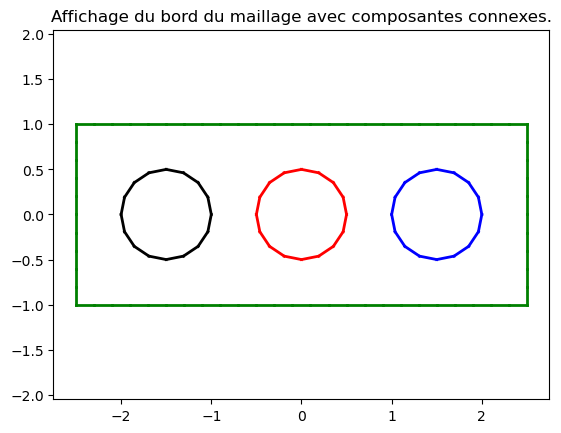

In [54]:
vtx = LoadVTX('maillage5.msh')
elt = LoadELT('maillage5.msh')
eltb, be2e = Boundary(elt)
PlotMeshBND1_withCC(vtx,eltb)

## Exercice 3<a id="part3"></a>

In [57]:
def Refine(vtx, elt) :
    refined_vtx = vtx #sommet déjà présents dans le maillage avant raffinement
    refined_elt = []
    l=len(vtx) #Numéro du noeud à ajouter : il y a déjà les noeuds 0, ..., l-1
    A={0,1,2} 
    combinaisons_indices=set(it.combinations(A,2)) 
    numeros_faces=[A.difference(B) for B in combinaisons_indices]
    
    """
    En fait, combinaisons_indices contient les élements qui sont des paires d'entiers correspondant aux indices des sommets
    Par convention, la face numéro k sera celle opposée au sommet k 
    Ainsi combinaisons_indices contient :
    (0,1)
    (0,2)
    (1,2)
    Et donc numeros_faces contient : 
    {2}
    {1}
    {0}
    """
    
    for e in elt : 
        
        for (ci,nf) in zip(combinaisons_indices,numeros_faces) : #boucle simultanée sur les couples (ci, nf)
            k=list(nf)[0] 
            f=(e[list(ci)[0]],e[list(ci)[1]])
            milieu=[(vtx[f[0]][0]+vtx[f[1]][0])/2,
                   (vtx[f[0]][1]+vtx[f[1]][1])/2] 
            refined_vtx.append(milieu)
        
        refined_elt=refined_elt+[[e[0],l,l+1],[l,l+2,l+1],[l,e[1],l+2],[l+1,l+2,e[2]]]
        l+=3
    
    return [refined_vtx,refined_elt]

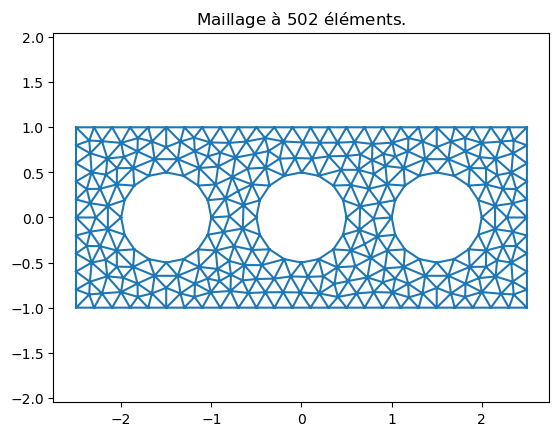

In [60]:
PlotMesh(vtx,elt) #avant raffinement 

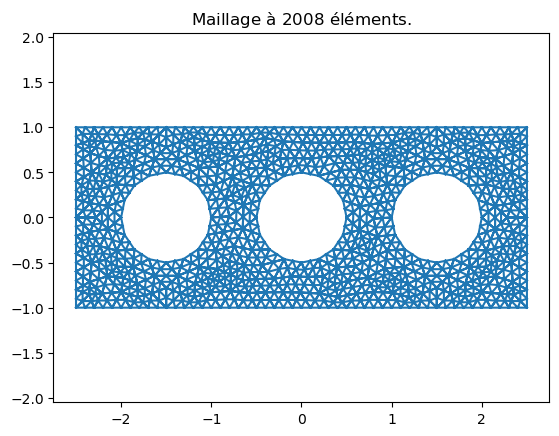

In [61]:
PlotMesh(Refine(vtx,elt)[0], Refine(vtx,elt)[1]) #après raffinement 